<a href="https://colab.research.google.com/github/lakhanrajpatlolla/lpatlolla-development/blob/master/U2W6_17_Word2Vec_Similarity_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

### Learning Objectives:

At the end of the experiment, you will be able to:

*  generate the vectors for the given words
*  find the similarities between the words


In [1]:
#@title Experiment Walkthrough Video
#@markdown Word2vec similarity
from IPython.display import HTML

HTML("""<video width="520" height="440" controls>
  <source src="https://cdn.exec.talentsprint.com/content/2021-06-08_iiith_aiml_word2vec_similarity.mp4">
</video>
""")

### Setup Steps:

In [2]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2418775" #@param {type:"string"}

In [3]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "9959000490" #@param {type:"string"}

In [4]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython
import re
ipython = get_ipython()

notebook= "U2W6_17_Word2Vec_Similarity_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    from IPython.display import HTML, display
    ipython.magic("sx wget https://cdn.talentsprint.com/talentsprint1/archives/sc/aiml/experiment_related_data/AIML_DS_GOOGLENEWS-VECTORS-NEGATIVE-300_STD.rar")
    ipython.magic("sx unrar e /content/AIML_DS_GOOGLENEWS-VECTORS-NEGATIVE-300_STD.rar")
    ipython.magic("sx wget https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Word2Vec_Similarity/dimensionality_reduction.py")
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getWalkthrough() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook, "feedback_walkthrough":Walkthrough ,
              "feedback_experiments_input" : Comments,
              "feedback_inclass_mentor": Mentor_support}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://learn-iiith.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


def getWalkthrough():
  try:
    if not Walkthrough:
      raise NameError
    else:
      return Walkthrough
  except NameError:
    print ("Please answer Walkthrough Question")
    return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Importing required packages

In [5]:
import numpy as np
import gensim
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

### Representation using Word2Vec pre-trained model

Load Gensim pretrained model

  * Gensim is an open source Python library for natural language processing. It is developed and is maintained by the Czech natural language processing researcher Radim Rehurek and his company RaRe Technologies.

  * Use gensim to load a word2vec model, pretrained on google news, covering approximately 3 million words and phrases. The vector length is 300 features.

  * Download the google news bin file with the limit 500000 words and save in a binary word2vec format. If **binary = True**, then the data will be saved in binary word2vec format, else it will be saved in plain text.

In [6]:
# Load 300 vectors directly from the file. As the model is in .bin extension, we need to enable default parameter, binary = True
model = gensim.models.KeyedVectors.load_word2vec_format('AIML_DS_GOOGLENEWS-VECTORS-NEGATIVE-300_STD.bin', binary=True, limit=500000)

Develop Word Embedding for the given list of words

In [7]:
words_list = ['India','Delhi','Turkey', 'Ankara', 'Russia', 'Moscow','Japan', 'Tokyo', 'Vietnam', 'Hanoi','China', 'Beijing']

In [17]:
vect = []
for word in words_list:
    # Getting vectors of the each word and appending to the list
    vect.append(model[word])

print(len(vect[0]))

300


###  Visualization and Plotting the reduced Word2Vec representation

The vector size of the given words is 300. To plot the words in 2 dimensions, reduce the  dimensionality of the 300-dimensional vectors to 2 dimensions.


In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_vector = pca.fit_transform(vect)
len(reduced_vector), len(reduced_vector[0])

(12, 2)


Visualize the words in 2D-plane

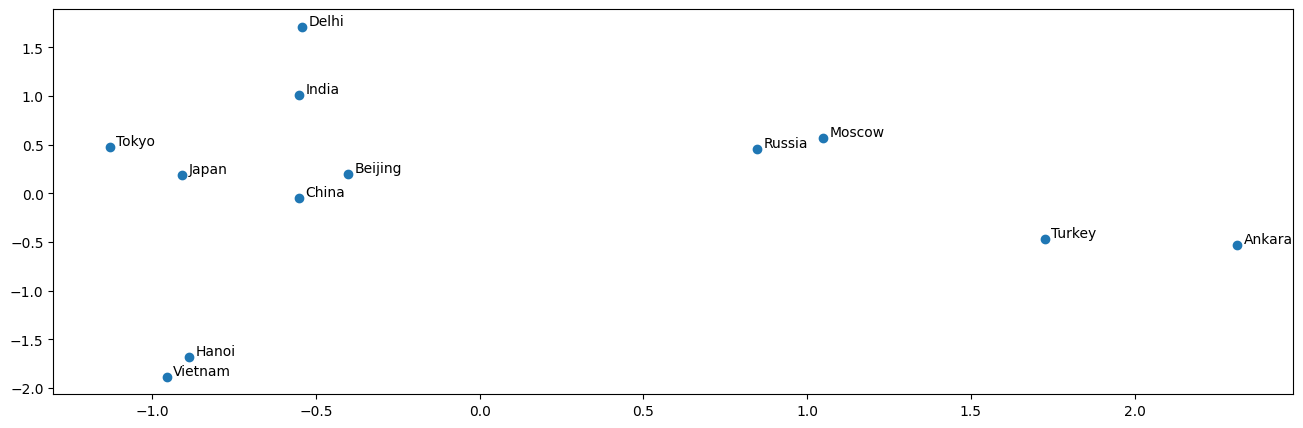

In [10]:
plt.figure(figsize=(16,5))
plt.scatter(reduced_vector[:,0],reduced_vector[:,1])
x, y = reduced_vector[:,0] , reduced_vector[:,1]

for i in range(len(x)):
  plt.annotate(words_list[i],xy=(x[i], y[i]), xytext=(x[i]+0.02, y[i]+0.02))

### Finding the cosine similarity  between the two words

In [11]:
# As the vectors are in one dimensional, convert it to 2D by reshaping
cosine_similarity(model['Tokyo'].reshape(1,-1), model['Japan'].reshape(1,-1))

array([[0.70022535]], dtype=float32)

### Finding the nearest or most similar words of a given word using Word2vec

In [12]:
model.most_similar('Tokyo', topn=5)

[('Osaka', 0.7306584119796753),
 ('Toyko', 0.7298397421836853),
 ('Nagoya', 0.7041050791740417),
 ('Japan', 0.7002254128456116),
 ('Seoul', 0.693085253238678)]

 A cosine value of 0 means that the two vectors are at 90 degrees to each other (orthogonal) and have no match. The closer the cosine value to 1, the smaller the angle and the greater the match between vectors.

### Ungraded Exercises

### Exercise 01: For the below given words, generate the vectors and visualize them in 2D

8 300
8 2
[-1.41765098 -1.80046345 -0.83027117 -1.14757102  1.00709577  0.93461096
  1.34859926  1.90565065]
[ 1.46177644  1.2266768  -1.54851378 -1.81045242  0.35997202  0.09461857
 -0.09897828  0.31490066]


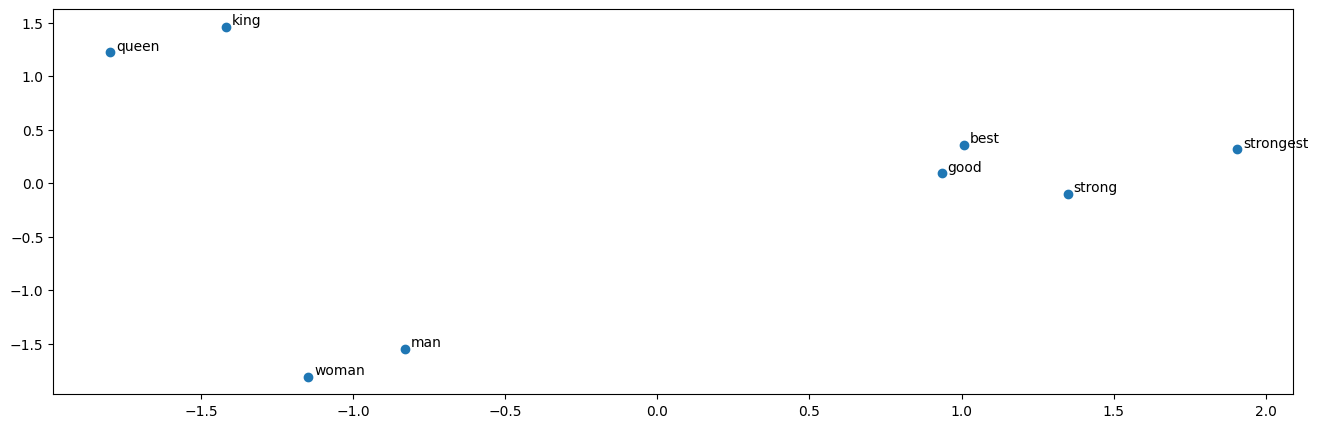

In [28]:
words = ['king', 'queen', 'man', 'woman', 'best', 'good', 'strong', 'strongest']
# YOUR CODE HERE

words_vec = []

for word in words:
  words_vec.append(model[word])
print(len(words_vec), len(words_vec[0]))
#print(words_vec[0])

# dimension is more than 300. Bring it into 2D space using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_words_vec = pca.fit_transform(words_vec)
print(len(reduced_words_vec), len(reduced_words_vec[0]))

#Plot them
plt.figure(figsize = (16,5))
x = reduced_words_vec[:,0]
print(x)
y = reduced_words_vec[:,1]
print(y)
plt.scatter(x,y)

for i in range(len(x)):
  plt.annotate(text = words[i], xy = (x[i], y[i]), xytext= (x[i]+0.02, y[i]+ 0.02))



### Exercise 02: Find the cosine similarity for 'king' and 'ruler'

In [34]:
# YOUR CODE HERE
cosine_similarity(model['king'].reshape(1,-1), model['ruler'].reshape(1,-1))

array([[0.5797567]], dtype=float32)

###Exercise 03: Find top 5 nearest or most similar words of a word 'king'

In [35]:
# YOUR CODE HERE
model.most_similar(model['king'], topn=5)

[('king', 1.0),
 ('kings', 0.7138044834136963),
 ('queen', 0.6510956883430481),
 ('monarch', 0.6413194537162781),
 ('crown_prince', 0.6204220056533813)]

### Please answer the questions below to complete the experiment:




In [36]:
#@title State True or False: If the cosine value is close to 0, means that smaller the angle and greater the match between two vectors. { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "TRUE" #@param ["","TRUE", "FALSE"]

In [37]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [38]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "It's good.I liked the word plotting. " #@param {type:"string"}


In [39]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [40]:
#@title  Experiment walkthrough video? { run: "auto", vertical-output: true, display-mode: "form" }
Walkthrough = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [41]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [42]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [43]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 1094
Date of submission:  27 Dec 2024
Time of submission:  13:51:09
View your submissions: https://learn-iiith.talentsprint.com/notebook_submissions
